In [2]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [4]:
df.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [5]:
df.isnull().sum()

SWI            0
SWF            0
temperature    0
size           0
management     0
duration       0
dtype: int64

In [6]:
df.describe()

,SWI,SWF,temperature,size,management,duration
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,1.896714,1.480679,16.372500,41.138214,4.082143,31.307143
std,0.610995,0.476403,3.619312,19.434496,2.520959,4.198304
min,0.480000,0.250000,3.500000,0.500000,0.000000,19.000000
25%,1.507500,1.190000,14.100000,27.275000,2.000000,29.000000
50%,1.825000,1.495000,17.050000,41.100000,4.000000,32.000000
75%,2.282500,1.790000,19.125000,54.725000,6.000000,34.000000
max,3.790000,2.840000,21.600000,94.200000,8.000000,41.000000


In [7]:
x = df.drop('SWI', axis = 1)
swi = df['SWI']

In [48]:
from sklearn.tree import DecisionTreeRegressor
train_x, test_x, train_y, test_y = train_test_split(x, swi, test_size = 0.25, random_state = 47)
# Define model. Specify a number for random_state to ensure same results each run
regressor= DecisionTreeRegressor()

# Fit model
regressor.fit(train_x,train_y)

DecisionTreeRegressor()

In [49]:
y_pred = regressor.predict(test_x)
check=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred,'val':1-(abs(test_y-y_pred)/test_y)})
check

,Actual,Predicted,val
39,1.48,1.60,0.918919
74,1.61,1.51,0.937888
221,2.51,2.70,0.924303
172,1.25,1.39,0.888000
32,2.05,2.75,0.658537
...,...,...,...
33,1.72,1.21,0.703488
127,1.90,1.99,0.952632
26,2.47,2.93,0.813765
239,1.55,1.90,0.774194


In [50]:
check.val.mean()

0.799098223792404

In [52]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')

In [53]:
test_pred = regressor.predict(test_new)

In [55]:
res = pd.DataFrame(test_pred)
res.index = test_new.index # its important for comparison
res.columns = ["SWI"]
res.to_csv("prediction_results_SWI.csv")   

In [22]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('SWI', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['SWI']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(df.head())
x.head()

    SWI   SWF  temperature  size  management  duration
0  0.59  1.30          3.5   0.5           2        20
1  1.21  1.85          4.6  47.2           3        19
2  1.08  0.97          4.8  53.3           4        22
3  1.60  1.67          5.2  27.2           8        20
4  2.95  2.41          5.7  38.8           6        22


,SWF,temperature,size,management,duration
0,0.405405,0.000000,0.000000,0.250,0.045455
1,0.617761,0.060773,0.498399,0.375,0.000000
2,0.277992,0.071823,0.563501,0.500,0.136364
3,0.548263,0.093923,0.284952,1.000,0.045455
4,0.833977,0.121547,0.408751,0.750,0.136364


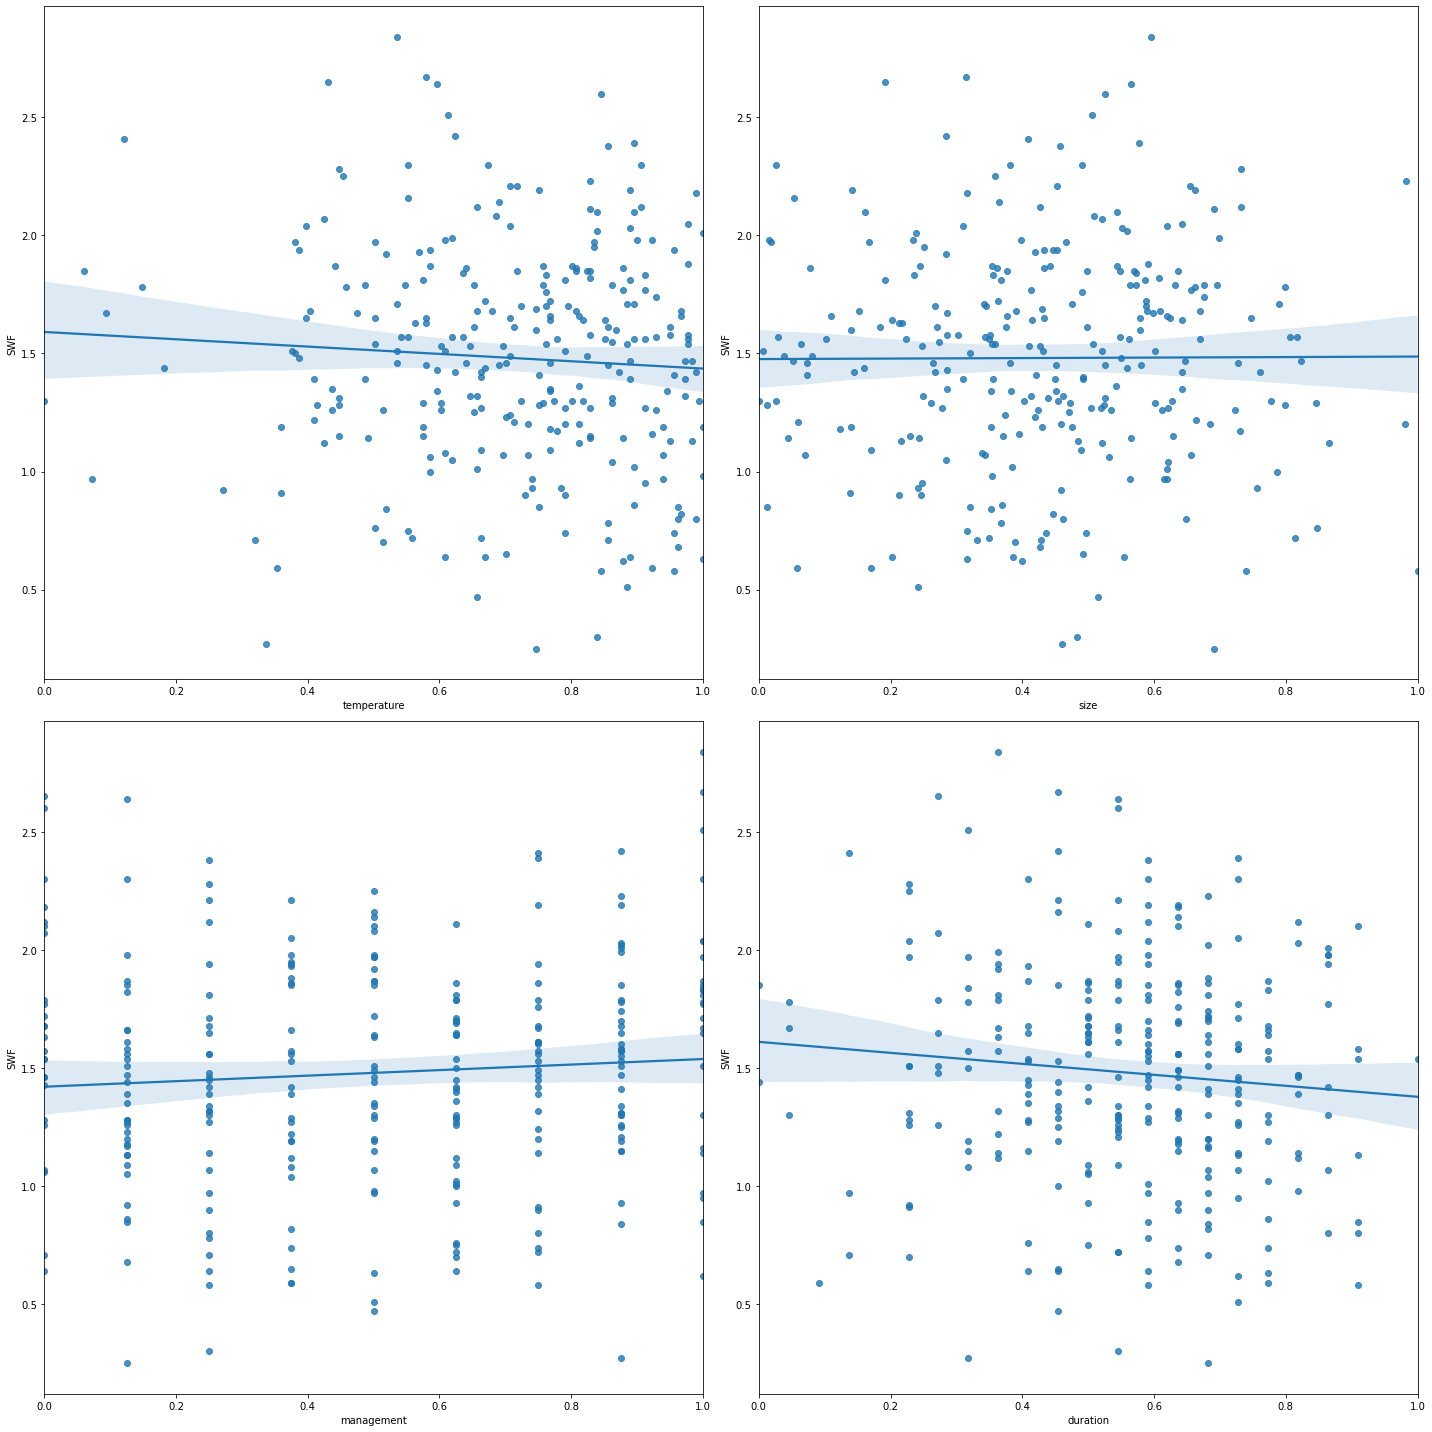

In [33]:
fig, axs = plt.subplots(ncols = 2, nrows = 2,figsize = (20, 20))
sns.regplot(y = df['SWF'], x = x['temperature'], ax = axs[0, 0])
sns.regplot(y = df['SWF'], x = x['size'], ax = axs[0, 1])
sns.regplot(y = df['SWF'], x = x['management'], ax = axs[1,0])
sns.regplot(y = df['SWF'], x = x['duration'], ax = axs[1, 1])
plt.tight_layout()

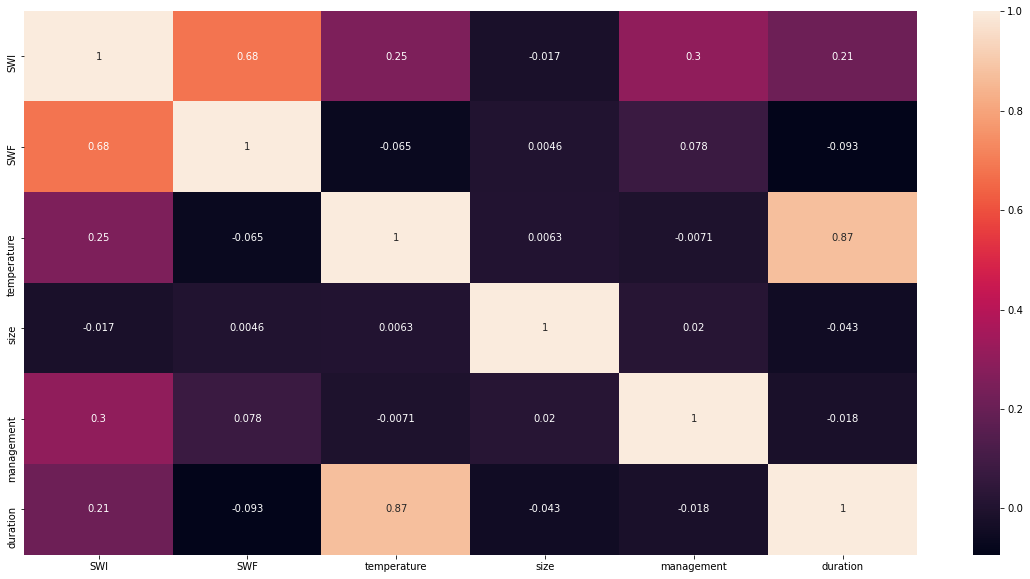

In [34]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [37]:
features = df.drop('SWI', axis = 1)
target = df['SWI']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 5)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (224, 5)
Train target shape   :  (224,)
Test features shape  :  (56, 5)
Test target shape    :  (56,)


In [39]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(normalize=True)

In [40]:
print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
    print(features.columns[i], ": ", model.coef_[i])

Model intercept  :  -0.6232899510770189 

Model coefficient:  [8.65247343e-01 4.40953722e-02 5.26968734e-04 6.32903120e-02
 7.94010622e-03] 

SWF :  0.8652473432742245
temperature :  0.044095372177708474
size :  0.0005269687339995462
management :  0.06329031201483452
duration :  0.007940106216918935


In [41]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['SWI']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

KeyError: 'price'